## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset

In [2]:
# Load the housing dataset
data = pd.read_csv('housing.csv')

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Shape: (20640, 10)

First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset Info:
<class 'pandas.cor

## Step 3: Data Preprocessing

In [3]:
# Handle missing values in total_bedrooms column
print("Missing values before:", data['total_bedrooms'].isnull().sum())
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)
print("Missing values after:", data['total_bedrooms'].isnull().sum())

# One-Hot Encoding for ocean_proximity (categorical variable)
print("\nOriginal categories in ocean_proximity:")
print(data['ocean_proximity'].value_counts())

data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
print("\nShape after encoding:", data_encoded.shape)

# Separate features (X) and target (y)
X = data_encoded.drop('median_house_value', axis=1)
y = data_encoded['median_house_value']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Missing values before: 207
Missing values after: 0

Original categories in ocean_proximity:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Shape after encoding: (20640, 13)

Features (X) shape: (20640, 12)
Target (y) shape: (20640,)


/tmp/ipython-input-677486653.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


## Step 4: Train-Test Split

In [4]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 16512
Testing set size: 4128


## Step 5: Feature Scaling

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")
print("Training data mean:", X_train_scaled.mean())
print("Training data std:", X_train_scaled.std())

Features scaled successfully
Training data mean: 1.360883843169402e-16
Training data std: 1.0


## Step 6: Train All Three Models

In [6]:
# 1. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# 3. Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
et_model.fit(X_train_scaled, y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=42)

## Step 7:  Predictions

In [7]:
# predictions on test set
dt_predictions = dt_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
et_predictions = et_model.predict(X_test_scaled)

## Step 8: Evaluate Models (MSE, RMSE, R²)

In [8]:
# DECISION TREE EVALUATION
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print("DECISION TREE REGRESSOR : ")

print(f"Mean Squared Error (MSE):        ${dt_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${dt_rmse:,.2f}")
print(f"R² Score:                        {dt_r2:.4f} ({dt_r2*100:.2f}%)")

# RANDOM FOREST EVALUATION
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("RANDOM FOREST REGRESSOR : ")
print(f"Mean Squared Error (MSE):        ${rf_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${rf_rmse:,.2f}")
print(f"R² Score:                        {rf_r2:.4f} ({rf_r2*100:.2f}%)")

# EXTRA TREES EVALUATION
et_mse = mean_squared_error(y_test, et_predictions)
et_rmse = np.sqrt(et_mse)
et_r2 = r2_score(y_test, et_predictions)

print("EXTRA TREES REGRESSOR : ")
print(f"Mean Squared Error (MSE):        ${et_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${et_rmse:,.2f}")
print(f"R² Score:                        {et_r2:.4f} ({et_r2*100:.2f}%)")

DECISION TREE REGRESSOR : 
Mean Squared Error (MSE):        $4,855,424,720.34
Root Mean Squared Error (RMSE):  $69,680.88
R² Score:                        0.6295 (62.95%)
RANDOM FOREST REGRESSOR : 
Mean Squared Error (MSE):        $2,401,861,420.45
Root Mean Squared Error (RMSE):  $49,008.79
R² Score:                        0.8167 (81.67%)
EXTRA TREES REGRESSOR : 
Mean Squared Error (MSE):        $2,736,461,169.41
Root Mean Squared Error (RMSE):  $52,311.20
R² Score:                        0.7912 (79.12%)


## Step 9: Comparison Table

In [9]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Extra Trees'],
    'MSE': [dt_mse, rf_mse, et_mse],
    'RMSE': [dt_rmse, rf_rmse, et_rmse],
    'R² Score': [dt_r2, rf_r2, et_r2]
})


print("MODEL COMPARISON TABLE : ")
print(results_df.to_string(index=False))

# Find best model
best_model_idx = results_df['R² Score'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
print(f"\n BEST MODEL: {best_model} (R² = {results_df.loc[best_model_idx, 'R² Score']:.4f})")

MODEL COMPARISON TABLE : 
        Model          MSE         RMSE  R² Score
Decision Tree 4.855425e+09 69680.877724  0.629473
Random Forest 2.401861e+09 49008.789216  0.816709
  Extra Trees 2.736461e+09 52311.195450  0.791175

 BEST MODEL: Random Forest (R² = 0.8167)


## Step 10: Predicted vs Actual Scatter Plots

 Plot saved: predicted_vs_actual.png


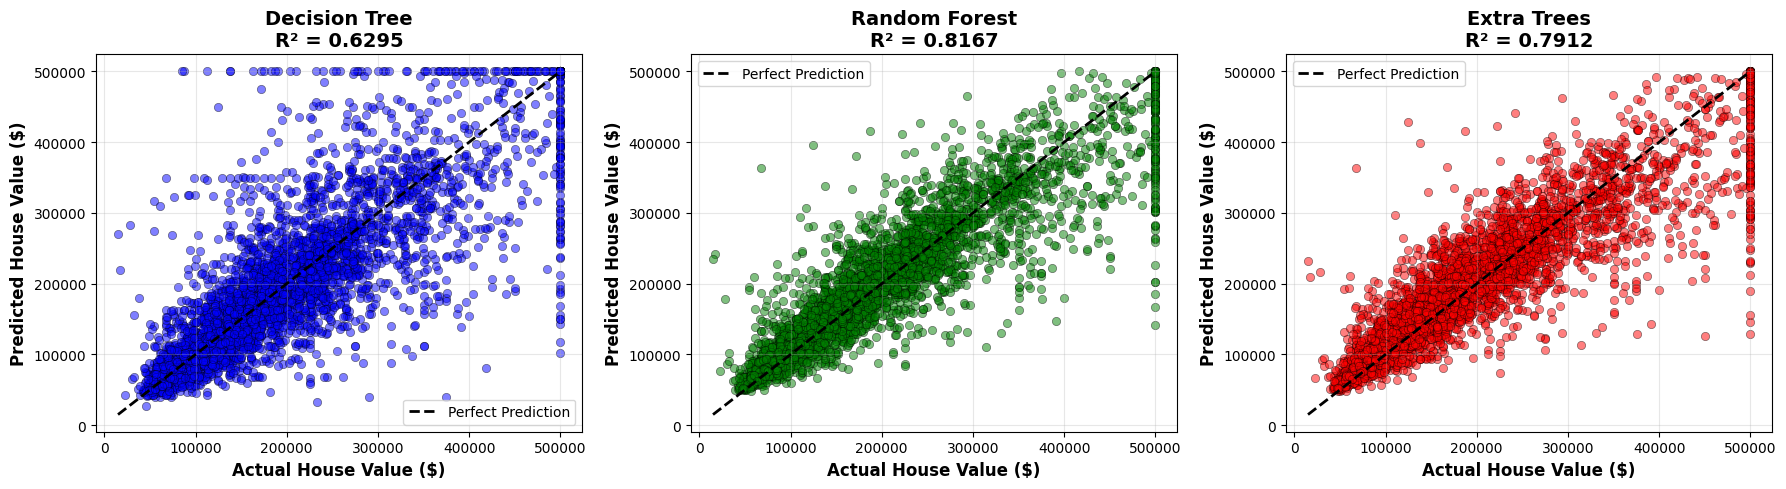

In [10]:
# Create 3 scatter plots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Decision Tree', dt_predictions, 'blue', dt_r2),
    ('Random Forest', rf_predictions, 'green', rf_r2),
    ('Extra Trees', et_predictions, 'red', et_r2)
]

for idx, (name, predictions, color, r2) in enumerate(models_data):
    ax = axes[idx]

    # Scatter plot
    ax.scatter(y_test, predictions, alpha=0.5, c=color, edgecolors='k', linewidth=0.5)

    # Perfect prediction line (y=x)
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

    # Labels and title
    ax.set_xlabel('Actual House Value ($)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Predicted House Value ($)', fontsize=12, fontweight='bold')
    ax.set_title(f'{name}\nR² = {r2:.4f}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
print(" Plot saved: predicted_vs_actual.png")
plt.show()

## Step 11: Metric Comparison Bar Charts

Plot saved: model_comparison.png


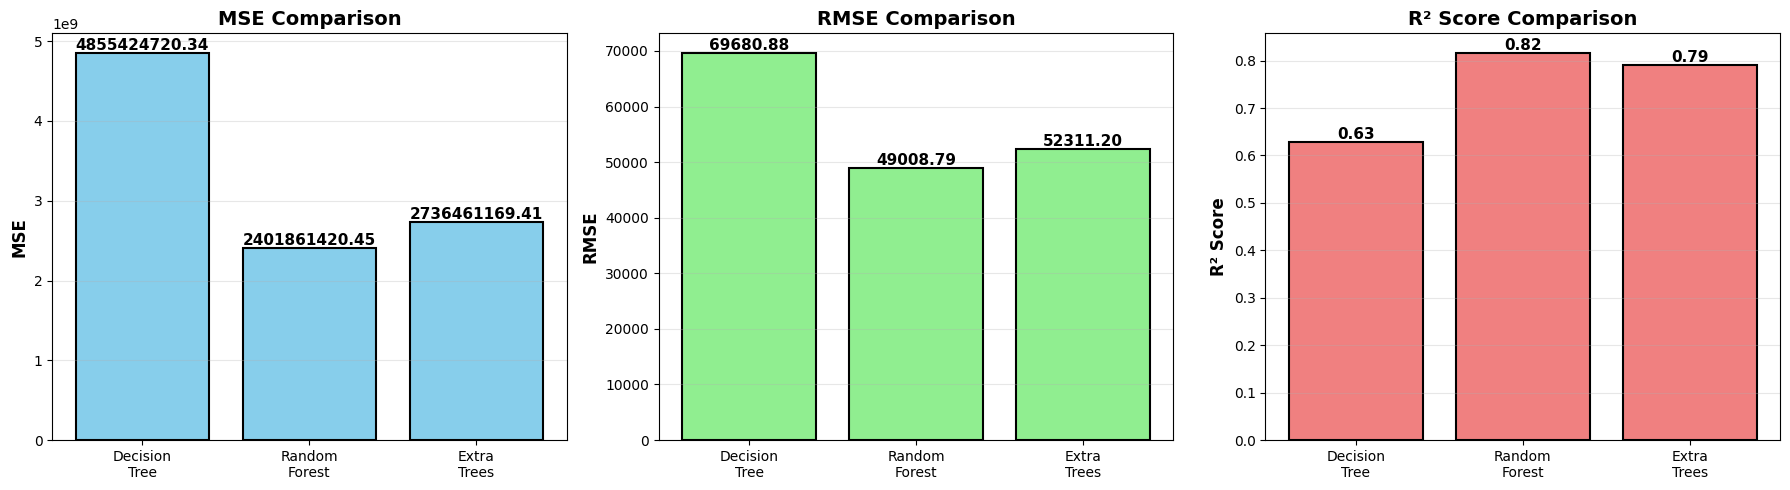

In [11]:
# Create bar charts for MSE, RMSE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_data = [
    ('MSE', [dt_mse, rf_mse, et_mse], 'skyblue'),
    ('RMSE', [dt_rmse, rf_rmse, et_rmse], 'lightgreen'),
    ('R² Score', [dt_r2, rf_r2, et_r2], 'lightcoral')
]

model_names = ['Decision\nTree', 'Random\nForest', 'Extra\nTrees']

for idx, (metric, values, color) in enumerate(metrics_data):
    ax = axes[idx]
    bars = ax.bar(model_names, values, color=color, edgecolor='black', linewidth=1.5)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold')

    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("Plot saved: model_comparison.png")
plt.show()

## Step 12: Residual Plots

 Plot saved: residual_plots.png


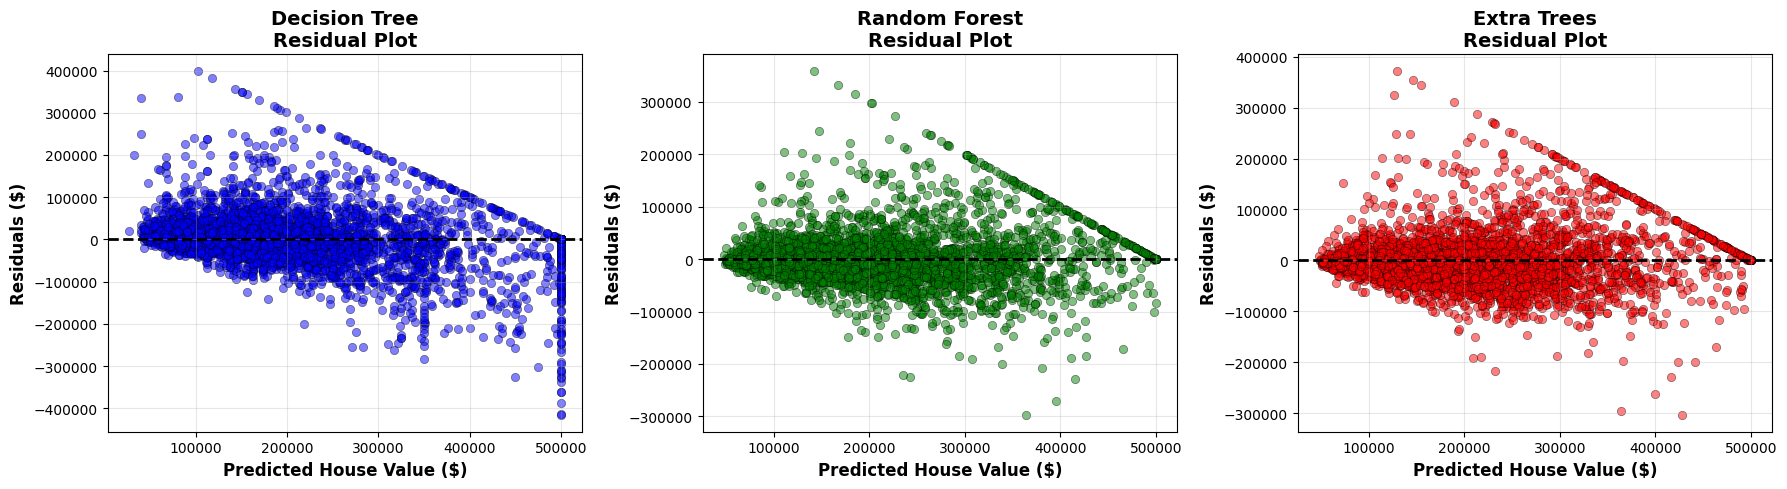

In [12]:
#  residual plots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, predictions, color, r2) in enumerate(models_data):
    ax = axes[idx]

    # Calculate residuals (errors)
    residuals = y_test - predictions

    # Scatter plot of residuals
    ax.scatter(predictions, residuals, alpha=0.5, c=color, edgecolors='k', linewidth=0.5)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=2)

    # Labels
    ax.set_xlabel('Predicted House Value ($)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
    ax.set_title(f'{name}\nResidual Plot', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
print(" Plot saved: residual_plots.png")
plt.show()

## Step 13: Feature Importance

Plot saved: feature_importance.png


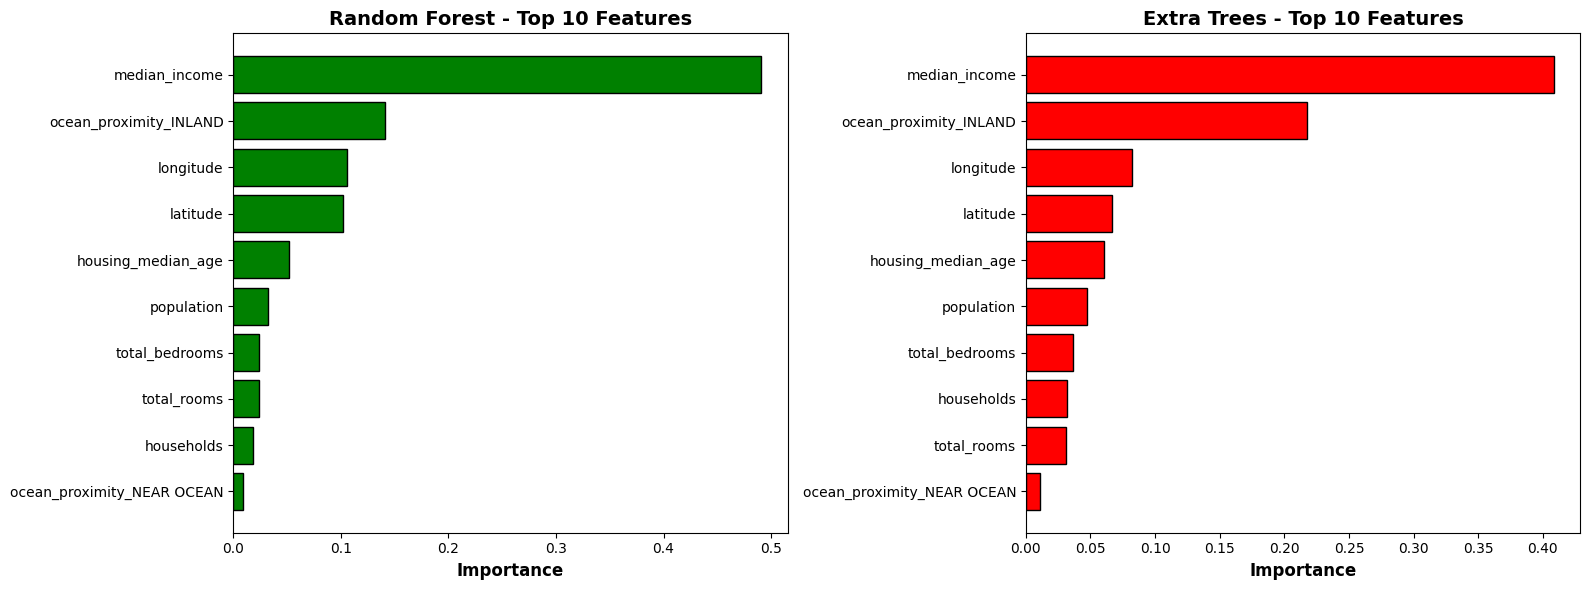


Top 5 Important Features (Random Forest):
                  Feature  Importance
7           median_income    0.490717
8  ocean_proximity_INLAND    0.140933
0               longitude    0.106093
1                latitude    0.101897
2      housing_median_age    0.052065

Top 5 Important Features (Extra Trees):
                  Feature  Importance
7           median_income    0.408358
8  ocean_proximity_INLAND    0.217193
0               longitude    0.082472
1                latitude    0.066576
2      housing_median_age    0.060538


In [13]:
# Get feature names
feature_names = X.columns

#  feature importance plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[0].barh(rf_importance['Feature'], rf_importance['Importance'],
             color='green', edgecolor='black')
axes[0].set_xlabel('Importance', fontsize=12, fontweight='bold')
axes[0].set_title('Random Forest - Top 10 Features', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Extra Trees Feature Importance
et_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': et_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[1].barh(et_importance['Feature'], et_importance['Importance'],
             color='red', edgecolor='black')
axes[1].set_xlabel('Importance', fontsize=12, fontweight='bold')
axes[1].set_title('Extra Trees - Top 10 Features', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("Plot saved: feature_importance.png")
plt.show()

print("\nTop 5 Important Features (Random Forest):")
print(rf_importance.head())

print("\nTop 5 Important Features (Extra Trees):")
print(et_importance.head())

## Final Discussion: Model Comparison

In [14]:

print("FINAL DISCUSSION: MODEL BEHAVIOR AND COMPARISON")


discussion = """
1. DECISION TREE REGRESSOR (Single Tree):
   • Uses a single decision tree to make predictions
   • PROS: Fast, interpretable, easy to visualize
   • CONS: Prone to OVERFITTING (memorizes training data)
   • Performance: Usually WORST among the three
   • High variance - unstable with different data

2. RANDOM FOREST REGRESSOR (Ensemble - Bagging):
   • Uses 100 decision trees working together
   • Each tree trained on random data subset (bootstrap)
   • Each split uses random feature subset
   • Final prediction = AVERAGE of all trees
   • PROS: Reduces overfitting, more stable, accurate
   • CONS: Slower to train, less interpretable
   • Performance: BETTER generalization

3. EXTRA TREES REGRESSOR (Extremely Randomized):
   • Similar to Random Forest but MORE RANDOM
   • Uses entire dataset (no bootstrap sampling)
   • Splits are completely random (faster)
   • PROS: Often FASTEST, better robustness
   • Performance: Often BEST or tied with RF

KEY INSIGHTS:
Ensemble methods (RF & ET) >> Single tree (DT)
Averaging multiple trees reduces variance and overfitting
Extra Trees adds more randomness for better robustness
Trade-off: interpretability vs accuracy

ACCURACY & GENERALIZATION:
• Decision Tree: Lower R², higher error (overfits)
• Random Forest: High R², lower error (generalizes well)
• Extra Trees: Often highest R², lowest error (best generalization)

WHEN TO USE WHICH:
• Decision Tree: Need interpretability, quick analysis
• Random Forest: Need accuracy, have time to train
• Extra Trees: Want best performance, have computational resources
"""

print(discussion)

print("ANALYSIS COMPLETE! : ")
print("\nGenerated Files:")
print("  1. predicted_vs_actual.png")
print("  2. model_comparison.png")
print("  3. residual_plots.png")
print("  4. feature_importance.png")

FINAL DISCUSSION: MODEL BEHAVIOR AND COMPARISON

1. DECISION TREE REGRESSOR (Single Tree):
   • Uses a single decision tree to make predictions
   • PROS: Fast, interpretable, easy to visualize
   • CONS: Prone to OVERFITTING (memorizes training data)
   • Performance: Usually WORST among the three
   • High variance - unstable with different data

2. RANDOM FOREST REGRESSOR (Ensemble - Bagging):
   • Uses 100 decision trees working together
   • Each tree trained on random data subset (bootstrap)
   • Each split uses random feature subset
   • Final prediction = AVERAGE of all trees
   • PROS: Reduces overfitting, more stable, accurate
   • CONS: Slower to train, less interpretable
   • Performance: BETTER generalization

3. EXTRA TREES REGRESSOR (Extremely Randomized):
   • Similar to Random Forest but MORE RANDOM
   • Uses entire dataset (no bootstrap sampling)
   • Splits are completely random (faster)
   • PROS: Often FASTEST, better robustness
   • Performance: Often BEST or tied